In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Coeficiente de asimetría de Fisher y coeficiente de curtosis

**Ejercicio 1:** Con los siguientes datos: 

13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465

calcular: la media, varianza, desviación típica y los coeficientes de asimetría de Fisher y coeficiente de Curtosis

**Solución**

In [5]:
datos = pd.Series([13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465])

11

In [6]:
#Cálculo de la media
datos.mean()

13.448000000000002

In [9]:
#Cálculo de la varianza
datos.var()

0.00025640000000000325

In [10]:
#Cálculo de la desviación típica
datos.std()

0.016012495120998577

In [28]:
#Tabla de frecuencias
tabla1_df = pd.DataFrame(datos, columns=['Datos'])
tabla1_df['ni'] = [1,1,2,1,1,1,2,3,1,2,1]
tabla1_df['fi'] = tabla1_df.ni/tabla1_df.ni.count()
tabla1_df

,Datos,ni,fi
0,13.404,1,0.090909
1,13.443,1,0.090909
2,13.445,2,0.181818
3,13.447,1,0.090909
4,13.449,1,0.090909
5,13.450,1,0.090909
6,13.453,2,0.181818
7,13.455,3,0.272727
8,13.457,1,0.090909
9,13.460,2,0.181818


In [53]:
#Definiendo la función de Fisher
def fisher(xi:pd.Series,ni:pd.Series) -> float:
    sumatoria = 0
    x = xi.mean()
    s_cubo = xi.std()**3
    n = xi.count()
    for i in range(n):
        sumatoria += ni.iloc[i] * (xi.iloc[i]-x)**3
    return sumatoria / (n*s_cubo)

In [56]:
#Calculando el valor de fisher 
fisher(tabla1_df.Datos, tabla1_df.ni)

-1.6602142424981243

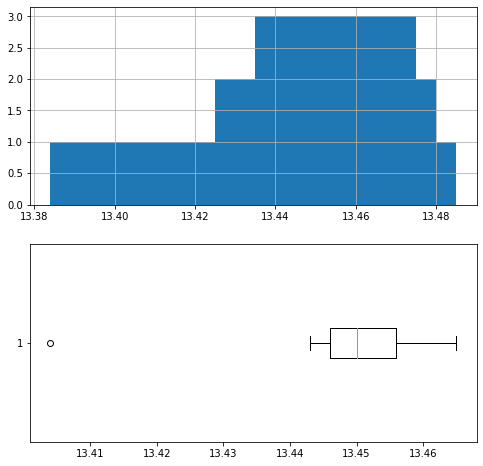

In [108]:
#Graficando la tabla de frecuencia para observar la asimetría
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax[0].bar(tabla1_df.Datos, tabla1_df.ni, width=0.04)
ax[0].grid()
ax[1].boxplot(tabla1_df.Datos, vert=False)
plt.show()